In [16]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import random_rotation
from tensorflow.image import random_crop
from tensorflow.image import random_contrast
from tensorflow.image import random_brightness
from tensorflow.image import random_flip_left_right
from tensorflow.image import random_hue
from tensorflow.image import random_jpeg_quality
from tensorflow.image import random_saturation
from tensorflow.errors import InvalidArgumentError, Axis

In [4]:
X = {}

for directory in os.listdir('downloads'):
    X[directory] = []
    for i, file in enumerate(os.listdir('downloads/' + directory)):
        with Image.open('downloads/' + directory + '/' + file) as img:
            X[directory] += [img.copy()]
    break

In [5]:
def show(img):
    display(Image.fromarray(img))

In [6]:
img = np.array(X['aster alpejski'][1])

In [7]:
def get_crop_size(img, minprop=0.7):
    def rand_prop(x):
        # Random number from x to 1
        return x + (1. - x) * np.random.random()
    
    height, width, chanells = img.shape
    height_prop = 1.
    width_prop = 1.
    
    if height > width:
        height_prop = rand_prop(minprop)
        width_prop = rand_prop(height_prop)
    else:
        width_prop = rand_prop(minprop)
        height_prop = rand_prop(width_prop)
    
    height = np.floor(height_prop * height).astype(int)
    width = np.floor(width_prop * width).astype(int)
    return (height, width, chanells)

In [8]:
def apply_random_transforms(img):
    img = random_rotation(img, 20, row_axis=0, col_axis=1, channel_axis=2, fill_mode='reflect')
    img = random_contrast(img, 0.8, 1.2)
    img = random_brightness(img, 0.08)
    img = random_hue(img, 0.025)
    img = random_saturation(img, 0.85, 1.15)
    img = random_jpeg_quality(img, 75, 95)
    img = random_flip_left_right(img)
    return random_crop(img, get_crop_size(img, 0.67)).numpy()

def get_augmented_image(img):
    return Image.fromarray(apply_random_transforms(np.array(img))).resize((224, 224))

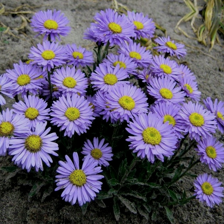

In [9]:
get_augmented_image(img)

In [23]:
if 0:
    for directory in os.listdir('downloads'):
        plant = directory
        print(plant)
        dest = "augmented/{}/".format(plant)
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        counter = 1
        if plant in ['aster alpejski', 'babka lancetowata', 'bażyna czarna', 'bez koralowy',
                     'borówka czarna', 'bylica pospolita', 'czosnek skalny', 'dzięgiel litwor',
                     'jaskier alpejski', 'koniczyna łąkowa', 'konwalia majowa', 'len karpacki',
                     'mniszek pospolity', 'nawłoć alpejska', 'oset siny', 'paprotka zwyczajna']: continue
        
        X_plant = []
        for i, file in enumerate(os.listdir('downloads/' + directory)):
            with Image.open('downloads/' + directory + '/' + file) as img:
                X_plant += [img.copy()]

        for img in X_plant:
            try:
                img.resize((224, 224)).save(
                    dest + "{}_{}.png".format(plant.replace(' ', '_'), counter)
                )
                counter += 1
                if counter % 10 == 0: print(counter)
            except OSError:
                display(img.resize((224, 224)))

        for img in X_plant:
            try:
                get_augmented_image(img).save(
                    dest + "{}_{}.png".format(plant.replace(' ', '_'), counter)
                )
                counter += 1
                if counter % 10 == 0: print(counter)
            except (InvalidArgumentError, np.AxisError):
                display(img.resize((224, 224)))

        n_items = len(X_plant)
        while counter <= 200:
            try:
                get_augmented_image(X_plant[np.random.randint(n_items)]).save(
                    dest + "{}_{}.png".format(plant.replace(' ', '_'), counter)
                )
                counter += 1
                if counter % 10 == 0: print(counter)
            except (InvalidArgumentError, np.AxisError):
                display(img.resize((224, 224)))